✅ File found at: data/DataCoSupplyChainDataset.csv
✅ Step 1: Data Loaded (180519 rows)
✅ Step 2: Optimal Hub Calculated at (29.74, -84.87)
✅ Step 3: Generating Map...


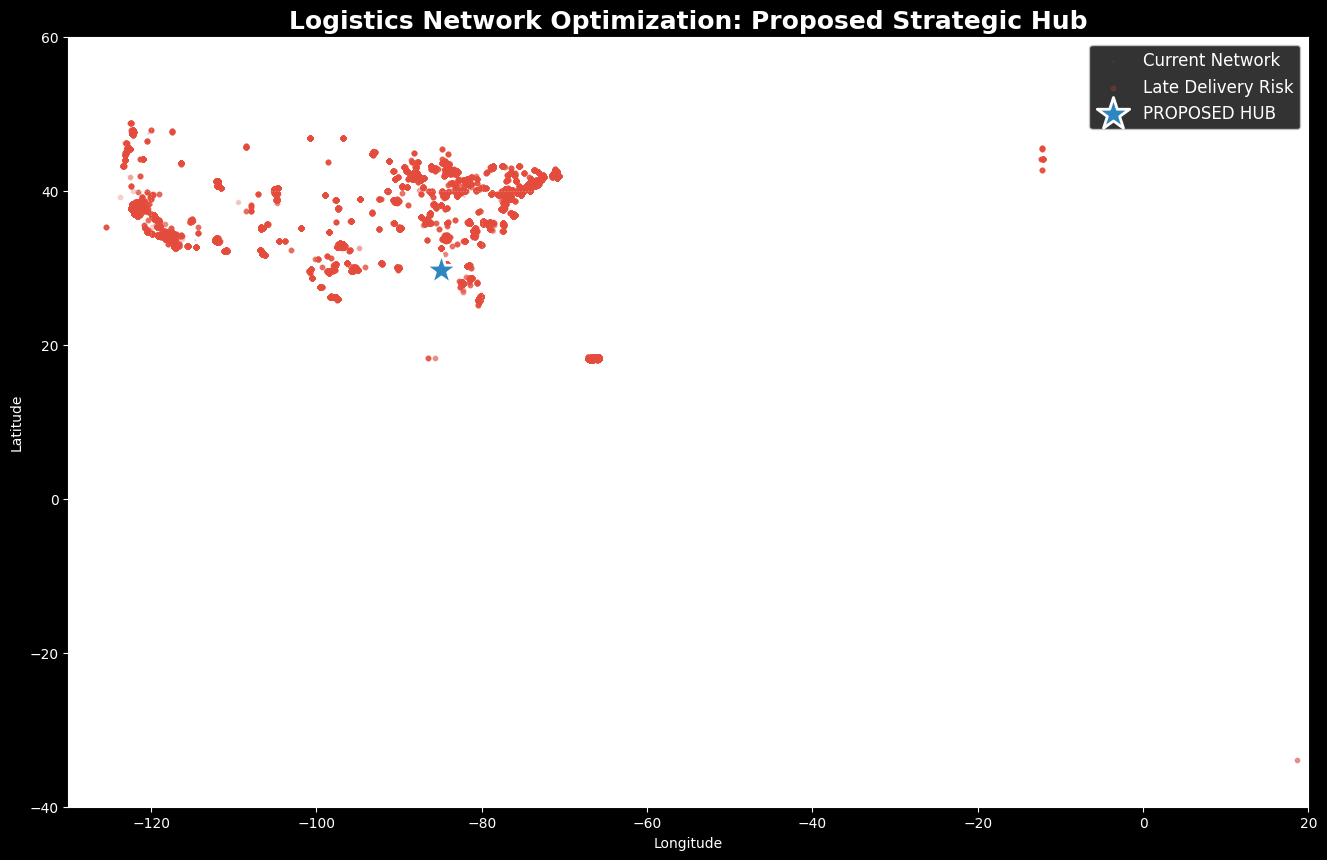

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- STEP 1: LOAD THE DATA ---
# We try two common paths just in case
path1 = "../data/DataCoSupplyChainDataset.csv"
path2 = "data/DataCoSupplyChainDataset.csv"

if os.path.exists(path1):
    target_path = path1
elif os.path.exists(path2):
    target_path = path2
else:
    target_path = None

if target_path:
    print(f"✅ File found at: {target_path}")
    df = pd.read_csv(target_path, encoding='latin1')
    df.columns = df.columns.str.strip() # Clean column names
    print(f"✅ Step 1: Data Loaded ({len(df)} rows)")
else:
    print("❌ ERROR: File not found in '../data/' or 'data/' folder.")
    print(f"Your current working directory is: {os.getcwd()}")
    # This stops the code here so we don't get a NameError later
    raise FileNotFoundError("Please move your CSV into the 'data' folder.")

# --- STEP 2: OPTIMIZATION MATH ---
# Filter for late deliveries
late_orders = df[df['Late_delivery_risk'] == 1].copy()

# Weighted Center of Gravity Calculation
total_weight = late_orders['Order Item Quantity'].sum()
optimal_lat = (late_orders['Latitude'] * late_orders['Order Item Quantity']).sum() / total_weight
optimal_lon = (late_orders['Longitude'] * late_orders['Order Item Quantity']).sum() / total_weight

print(f"✅ Step 2: Optimal Hub Calculated at ({optimal_lat:.2f}, {optimal_lon:.2f})")

# --- STEP 3: PROFESSIONAL VISUALIZATION ---
plt.figure(figsize=(16, 10))

# 1. Background Demand (Grey)
plt.scatter(df['Longitude'], df['Latitude'], c='#BDC3C7', alpha=0.05, s=1, label='Current Network')

# 2. Late Risks (Red)
plt.scatter(late_orders['Longitude'], late_orders['Latitude'], c='#E74C3C', alpha=0.2, s=10, label='Late Delivery Risk')

# 3. The Proposed Hub (Blue Star)
plt.scatter(optimal_lon, optimal_lat, c='#2E86C1', s=600, marker='*', edgecolor='white', linewidth=2, label='PROPOSED HUB')

# Zoom settings for the Americas/Atlantic region
plt.xlim(-130, 20)
plt.ylim(-40, 60)

plt.title('Logistics Network Optimization: Proposed Strategic Hub', fontsize=18, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.3)
plt.gca().set_facecolor('white')

print("✅ Step 3: Generating Map...")
plt.show()

In [13]:
import pandas as pd

# Summary of the findings
summary_data = {
    "Metric": ["Total Orders Analyzed", "Late Delivery Risk Count", "Risk Percentage", "Optimal Latitude", "Optimal Longitude"],
    "Value": [
        len(df),
        len(late_orders),
        f"{(len(late_orders)/len(df)*100):.2f}%",
        f"{optimal_lat:.4f}",
        f"{optimal_lon:.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("--- PROJECT RECOMMENDATION SUMMARY ---")
display(summary_df)

summary_df.to_csv("Hub_Optimization_Results.csv", index=False)
print("\n✅ Results saved to 'Hub_Optimization_Results.csv'")

--- PROJECT RECOMMENDATION SUMMARY ---


,Metric,Value
0,Total Orders Analyzed,180519
1,Late Delivery Risk Count,98977
2,Risk Percentage,54.83%
3,Optimal Latitude,29.7417
4,Optimal Longitude,-84.8707



✅ Results saved to 'Hub_Optimization_Results.csv'
